# SVM example for classifying Tree Cover

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/CML_me/CML_Project_2')

In [4]:
from utils import helper_functions
from helper_classes import *
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import ipywidgets
from math import floor, ceil
from sklearn.svm import SVC#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict as cvp

In [5]:
df_train = pd.read_csv("MultiClass_Train.csv")
df_test = pd.read_csv("MultiClass_Test.csv")
df_train['Cover_Type_7'] = [1 if i == 7 else 0 for i in df_train.Cover_Type]
numerical_features = ['Elevation', 'Aspect', 'Slope', 'Horiz_dist_hydro', 'Vertical_dist_hydro',
                      'Horiz_dist_roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                      'Horiz_dist_firepoints']
# that would be a bit more elegant 
#numerical_cols = df_train.drop(drop, axis = 1).select_dtypes([np.number]).columns
target = 'Cover_Type_7'
multi_target = 'Cover_Type'
categorical_features = ['Soil_Type', 'Wilderness_Area']
drop_train = ['Index', 'Cover_Type_7', 'Cover_Type']
drop_test = ['Index']
for i in categorical_features:
  df_train=pd.get_dummies(df_train, prefix=[i], columns=[i], drop_first = True)

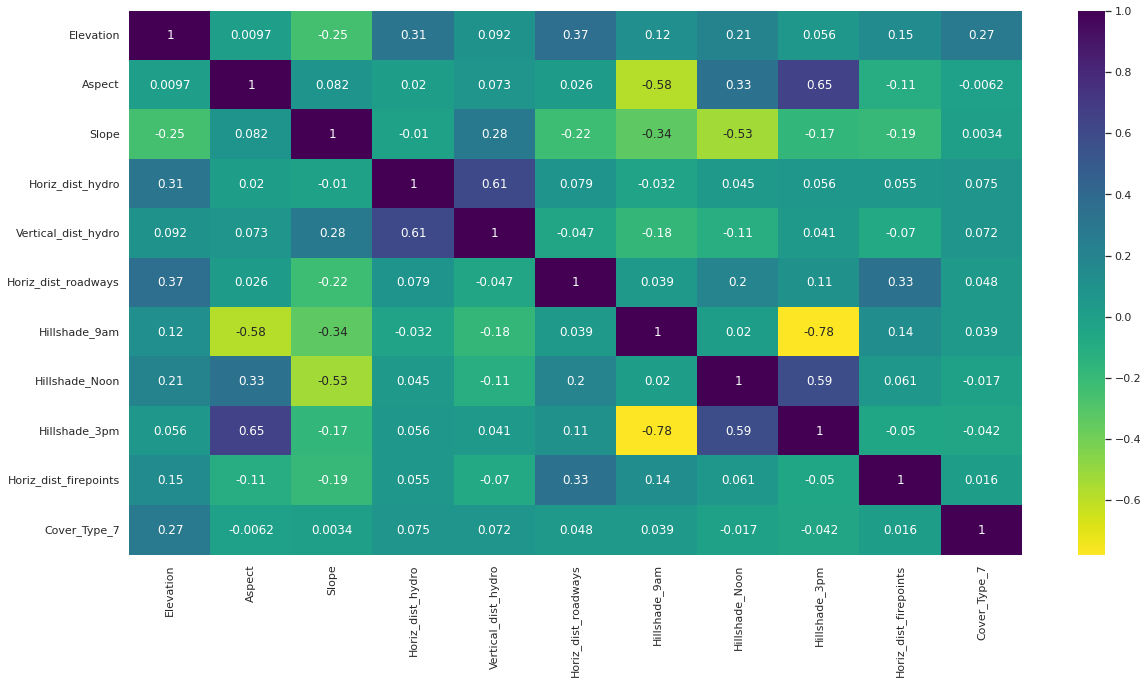

In [26]:
corr = df_train[numerical_features + [target]].corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'viridis_r', annot = True)

In [ ]:
X = df_train.drop(drop_train, axis = 1)
y = df_train[target]

In [7]:
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

""" also in case for missing values
imp = SimpleImputer(strategy="mean")
imp.fit(X[numerical_features])
X_test[numerical_features] = imp.transform(X_test[numerical_features])
and outliers? """  


In [10]:
# first simple implementation
from sklearn.metrics import make_scorer
linear_svc = SVC(kernel='linear', probability = True) #class_weight imbalance not addressed 
grid_values = {'C':[0.1, 1, 10]}
#auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
grid_linear_svc = GridSearchCV(linear_svc, param_grid = grid_values,scoring = 'accuracy', cv=5)
grid_linear_svc.fit(train_data[numerical_features+categorical_features], train_data[target])
y_hat = grid_linear_svc.predict(train_data[numerical_features+categorical_features]) 
print(classification_report(train_data[target], y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     58843
           1       0.70      0.52      0.60      2163

    accuracy                           0.98     61006
   macro avg       0.84      0.76      0.79     61006
weighted avg       0.97      0.98      0.97     61006



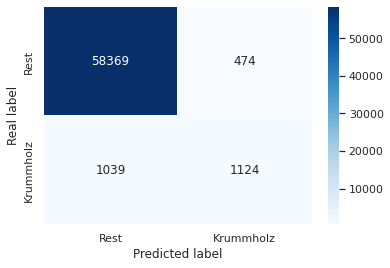

In [13]:
class_labels = ["Survived","Died"]
labels = [0,1]
cm = confusion_matrix(y_pred=y_hat, y_true=train_data[target], labels=labels)
plot_confusion_matrix(cm, class_labels)

In [14]:
grid_linear_svc.best_estimator_

SVC(C=1, kernel='linear')

In [16]:
## then use kernel
rbf_svc = SVC(kernel='rbf', probability = True)
grid_values = {'C':[0.1, 1, 10], 'gamma':[0.1,0.25,0.5,0.75]}
# but it is super stupid to optimize for accuracy 
grid_rbf_svc = GridSearchCV(better_SVC, param_grid=grid_values, scoring = 'accuracy', cv = 5)
grid_rbf_svc.fit(train_data[numerical_features+categorical_features], train_data[target])
y_hat = grid_rbf_svc.predict(train_data[numerical_features+categorical_features])
print(classification_report(train_data[target], y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58843
           1       0.97      0.95      0.96      2163

    accuracy                           1.00     61006
   macro avg       0.98      0.97      0.98     61006
weighted avg       1.00      1.00      1.00     61006



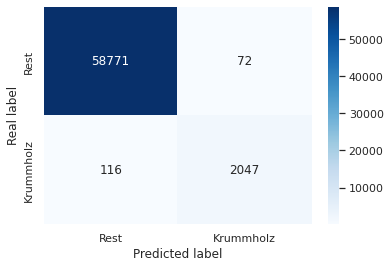

In [17]:
cm = confusion_matrix(y_pred=y_hat, y_true=train_data[target], labels=labels)
plot_confusion_matrix(cm, class_labels)

In [18]:
long_grid.best_estimator_

SVC(C=10, gamma=0.25)

In [20]:
## let's take a closer look at the model above (refitted)
## here would be the part for like out of sample performance but I'm lazy
best_SVC = SVC(kernel='rbf', C=10, gamma=0.25)
best_SVC.fit(X,y)

SVC(C=10, gamma=0.25)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

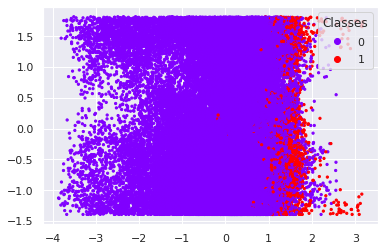

In [21]:
fig, ax = plt.subplots()
scatter=ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=5, cmap='rainbow')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
plot_svc_decision_function(best_SVC, plot_support=False)

okay lol that whole plotting is pointless - but super nice examples in class Jack! 

In [22]:
from sklearn.model_selection import cross_val_predict
y_hat = cross_val_predict(best_SVC, X, y, cv = 5)

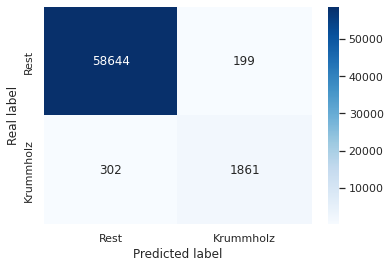

In [23]:
cm = confusion_matrix(y_pred=y_hat, y_true=y, labels=labels)
plot_confusion_matrix(cm, class_labels)

In [29]:
best_SVC.decision_function

<bound method BaseSVC.decision_function of SVC(C=10, gamma=0.25)>

To be fair without any imbalance management or outliers etc. thats pretty game

In [ ]:
# Also interesting
from sklearn.svm import OneClassSVM
# apparently this one is also superb for outliers 
